<a href="https://colab.research.google.com/github/lapshinaaa/homework_machineLearning/blob/main/homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа

В этой работы мы будем учиться предсказывать зарплату data scientist-ов в зависимочти от ряда факторов с помощью градиентоного бустинга

Цель домашней работы научиться предсказывать зарплаты (salary_in_usd) по ряды факторов

work_year: The number of years of work experience in the field of data science.

experience_level: The level of experience, such as Junior, Senior, or Lead.

employment_type: The type of employment, such as Full-time or Contract.

job_title: The specific job title or role, such as Data Analyst or Data Scientist.

salary: The salary amount for the given job.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The percentage of remote work offered in the job.

company_location: The location of the company or organization.

company_size: The company’s size is categorized as Small, Medium, or Large.

In [1]:
import pandas as pd

In [2]:
!wget https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw-08-boosting/ds_salaries.csv

--2023-06-21 12:15:28--  https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw-08-boosting/ds_salaries.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw-08-boosting/ds_salaries.csv [following]
--2023-06-21 12:15:28--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw-08-boosting/ds_salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210076 (205K) [text/plain]
Saving to: ‘ds_salaries.csv’

ds_salaries.csv     100%[===================>] 205.15K  --.-KB/s    in 0.04s   

2023-06-21 12:15:28 (4.90 MB/s

In [3]:
df = pd.read_csv("ds_salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Задание 1 (0.5 балла)

Разделите выборку на train, val, test (80%, 10%, 10%) в качестве таргета выберите salary_in_usd, удалите из признаков (salary) чтобы избежать лика в данных.

In [5]:
from sklearn.model_selection import train_test_split

# deleting the 'salary' column, defining X and target variable:
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# splitting the data into train, val and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test_test, y_val, y_test_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 17)

X_val

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3311,2022,EX,FT,Head of Data Science,USD,US,100,US,M
175,2023,SE,FT,Data Analyst,GBP,CF,100,CF,M
3676,2021,SE,FT,Machine Learning Scientist,USD,US,100,CA,L
1604,2023,SE,FT,Machine Learning Engineer,EUR,LV,0,LV,M
1426,2023,SE,FT,Machine Learning Engineer,USD,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3039,2022,SE,FT,Data Science Manager,USD,US,100,US,L
2908,2022,SE,FT,Data Analyst,USD,US,0,US,L
1614,2023,SE,FT,Data Scientist,USD,US,100,US,M
3703,2021,MI,FT,Data Scientist,BRL,BR,0,BR,S


## Задание 2 (0.5 балла)

Обучите модель линейной регресии и оцените её качество через mape и rmse

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

categorical_columns = X.select_dtypes(include='object').columns # selecting categorical data
X_train_drop = X_train.drop(categorical_columns, axis=1)
X_val_drop = X_val.drop(categorical_columns, axis=1)
X_test_drop = X_test_test.drop(categorical_columns, axis=1)

# creating an instance of a model and fitting it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_drop, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = linear_regressor.predict(X_test_drop)
y_val_pred = linear_regressor.predict(X_val_drop)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test_test, y_test_pred)
test_rmse = mean_squared_error(y_test_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

# NOTE: a model cannot be fitted without the proper handling of categorical
# features first. In this task, we can either drop them or encode. Since encoding
# is supposed to be performed later, some of the features have been dropped.
# Sklearn's linear regressor cannot perform well without the preliminary data preprocessing.

MAPE score on validation set: 0.6694666794357188
RMSE score on validation set: 59766.824655346245
MAPE score on test set: 0.6514027853443363
RMSE score on test set: 63544.73382433843


## Задание 3 (0.5 балла)

Обучите модель бустинга выберите любую из трех библиотек catboost, xgboost,
lightgbm и оцените её качество через mape и rmse

In [7]:
from xgboost import XGBRegressor

# creating an instance of a model and fitting it
xg_boost = XGBRegressor()
xg_boost.fit(X_train_drop, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = xg_boost.predict(X_test_drop)
y_val_pred = xg_boost.predict(X_val_drop)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test_test, y_test_pred)
test_rmse = mean_squared_error(y_test_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.6059462896177483
RMSE score on validation set: 57367.10506318914
MAPE score on test set: 0.6084349615052234
RMSE score on test set: 62991.68013441048


## Задание 4 (0.5 балла)

Далее предобработайте категориальные признаки с помощью onehot кодирования, labelencoder и счетчиков (mean target encoding) сравните качество моделей с помощью mape и rmse. Необходимо обучить две модели линейную и бустинг. Какие выводы можно сделать? Выберите лучшую из моделей и дальше будем работать с ней

In [8]:
# checking if there are any missing values:
df.isnull().sum() # no missing values found

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# checking how many unique values we have for certain features
print(df['employment_type'].unique())
print(df['experience_level'].unique())
print(df['company_size'].unique())

['FT' 'CT' 'FL' 'PT']
['SE' 'MI' 'EN' 'EX']
['L' 'S' 'M']


In [10]:
!pip install category_encoders
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
target_encoder = TargetEncoder()
one_hot_encoder = OneHotEncoder()

# deleting the 'salary' column, defining X and target variable again
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# encoding categorical features with label encoding and target encoding
label_encoding_cols = ['experience_level', 'company_size'] # these features have some kind of order
mean_target_features = ['company_location', 'employee_residence',
                        'job_title', 'salary_currency'] # these features are more connected with the target variable

for feature in label_encoding_cols:
    X[feature] = label_encoder.fit_transform(X[feature])

X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# one-hot encoding for features with no order
one_hot_encoding_cols = ['employment_type']
X_encoded = pd.get_dummies(X, columns=one_hot_encoding_cols, drop_first=True)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_encoded, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

In [12]:
X_train.head()

,work_year,experience_level,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,employment_type_FT,employment_type_PT
3565,2021,3,142785.734615,83850.270233,86988.344240,100,86890.065019,1,0,1,0
3505,2021,3,154690.726644,62281.733082,125515.968509,50,127372.958462,1,0,1,0
115,2023,3,140869.765476,149366.906638,152822.011651,0,151822.009539,1,0,1,0
3415,2022,3,140869.765476,149366.906638,152822.011651,100,151822.009539,1,0,1,0
2320,2022,3,152364.954370,149366.906638,152822.011651,100,151822.009539,1,0,1,0


In [14]:
# Linear regression model
# creating an instance of a model and fitting it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = linear_regressor.predict(X_test)
y_val_pred = linear_regressor.predict(X_val)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.40939617086667773
RMSE score on validation set: 49326.586749873066
MAPE score on test set: 0.4310689685560313
RMSE score on test set: 52363.27780518678


In [15]:
# Boosting model
# creating an instance of a model and fitting it
xg_boost = XGBRegressor()
xg_boost.fit(X_train, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = xg_boost.predict(X_test)
y_val_pred = xg_boost.predict(X_val)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.33608787277340735
RMSE score on validation set: 47507.15161362332
MAPE score on test set: 0.3223811968539423
RMSE score on test set: 51725.5269850841


**ВЫВОДЫ:** Модели, обученные на закодированных данных, имеют более низкое качество, поскольку one-hot encoding создает слишком большое количество новых признаков, что, видимо, приводит к переобучению. Кроме того, имеет смысл в дальнейшем также использовать OrdinalEncoder, нормализацию значений признаков и далее исследовать взаимосвязи как признаков между собой, так и с целевой переменной. Из новых обученных моделей имеет смысл выбрать модель линейной регрессии и далее работать над улучшением ее качества, поскольку из этих двух моделей она на данном этапе показывает лучший результат.

## Задание 5 (0.5 балла)

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируете их, постарайтесь выделить группы с причинами ошибок в модели. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [16]:
# getting the absolutely values of errors:
abs_error = abs(y_test_pred - y_test)

# creating a data frame with sorted values
errors_result = pd.DataFrame({'y values': y_test, 'Predicted': y_test_pred,
                             'Error': abs_error})
sorted_errors_result = errors_result.sort_values('Error', ascending=False)

sorted_errors_result.head(20)

,y values,Predicted,Error
3713,120000,389391.687500,269391.687500
1288,385000,130767.218750,254232.781250
649,376080,158613.781250,217466.218750
3463,405000,199120.062500,205879.937500
2374,350000,158904.812500,191095.187500
2986,250000,80375.335938,169624.664062
3623,150000,308942.562500,158942.562500
1097,300240,168635.484375,131604.515625
2708,250000,124388.570312,125611.429688
1677,297300,176110.921875,121189.078125


In [17]:
# getting indices of the biggest errors and corresponding examples
error_indices = sorted_errors_result.index.tolist()
error_examples = X.iloc[error_indices]

error_examples

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3713,2020,3,FT,140869.765476,149366.906638,152822.011651,50,151822.009539,0
1288,2023,3,FT,108716.227124,149366.906638,152822.011651,0,151822.009539,1
649,2023,3,FT,161706.446040,149366.906638,152822.011651,100,151822.009539,1
3463,2022,3,FT,148022.559367,149366.906638,152822.011651,100,151822.009539,0
2374,2022,3,FT,140869.765476,149366.906638,152822.011651,100,151822.009539,1
...,...,...,...,...,...,...,...,...,...
2134,2022,3,FT,142785.734615,149366.906638,152822.011651,100,151822.009539,1
1954,2022,3,FT,108716.227124,149366.906638,152822.011651,100,151822.009539,1
168,2023,2,FT,142785.734615,149366.906638,152822.011651,0,151822.009539,1
2910,2022,3,FT,129673.928627,149366.906638,152822.011651,100,151822.009539,1


In [18]:
error_y = y.iloc[error_indices]
error_y

3713    120000
1288    385000
649     376080
3463    405000
2374    350000
         ...  
2134    154600
1954    115934
168     130000
2910     81000
3332    116150
Name: salary_in_usd, Length: 376, dtype: int64

**ВЫВОДЫ:** наиболее популярной ошибкой модели являются data scientist'ы, работающие FT (full-time). Для большинства из них также верно, что их компании находятся в одном регионе, получают з/п в одной валюте и сами рабочие проживают в одной области. При этом, несмотря на схожесть по многим объясняющим переменным, значения целевой переменной для них разнятся - отсюда и могут следовать ошибки модели. Чтобы избавиться от этих ошибок, можно, во-первых, нормировать значения вышеупомянутых переменных, поскольку они имеют большие значения и явно приводят к переобучению (либо можно использовать с этой же целью регуляризацию). Кроме того, имеет смысл добавить веса более значимым признакам, таким как уровень опыта, job title.

## Задание 6 (0.5 балла)

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качество модели? Реализуйте признаки и проверьте улучшилось ли качество модели. Полный балл за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы

<ipython-input-21-16d682f7920f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


<Axes: >

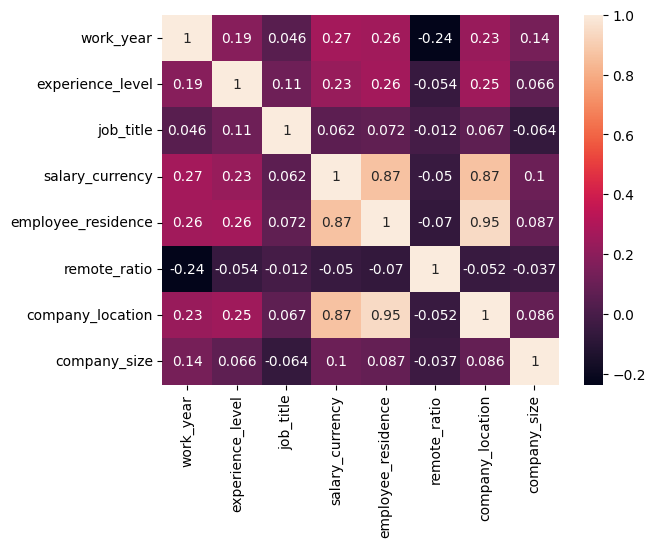

In [21]:
import seaborn as sns
# taking a look at dependencies between the features
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = True)

**ВЫВОДЫ:** логичным сделать предположения (которые подтверждаются приведенной выше матрицей корреляции признаков) о том, что признаки "salary_currency", "employee_residence", и "company_location" имеют большую корреляцию. В таком случае, имеет смысл (чтобы избежать переобучения) объединить эти три признака в один (можем, например, просто оставить признак "company_location" - наиболее полно из трех описывает взаимосвязь с целевой переменной).
Помимо этого, можно добавить новый признак - среднее значение зарплаты в данной области. Поскольку зарплата сильно разнится от региона к региону (тем более, от страны к стране), то сделать это может быть довольно непросто (однако, разумно).
Более корректно закодируем переменные (используем OrdinalEncoder для сохранения иерархии в значениях некоторых категориальных признаков) и посмотрим на результат.

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# deleting the chosen features
X = df.drop(['salary', 'salary_in_usd', 'employee_residence', 'salary_currency'], axis=1)
y = df['salary_in_usd']

ordinal_encoder = OrdinalEncoder() # using OrdinalEncoder to keep the hierarchy
                                    # of values for certain features
linear_regression = LinearRegression()

# encoding categorical features with ordinal encoding
ordinal_encoding_cols = ['experience_level', 'company_size', 'job_title']
X[ordinal_encoding_cols] = ordinal_encoder.fit_transform(X[ordinal_encoding_cols])

# using mean-target encoding
mean_target_features = ['company_location', 'employment_type']
X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

# fitting the ridge regression model
linear_regression.fit(X_train, y_train)

# getting predictions for validation and test sets
y_val_pred = linear_regression.predict(X_val)
y_test_pred = linear_regression.predict(X_test)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.43267301464458735
RMSE score on validation set: 51548.23623082476
MAPE score on test set: 0.43410419341385953
RMSE score on test set: 54362.20872828927


**РЕЗУЛЬТАТЫ:** качество модели удалось повысить за счет реализации вышеуказанных замечаний.

## Задание 7 (0.5 балла)

Теперь используете исключительно catboost. Обучить модель. Подберите оптимальные гиперпараметры. Используйте pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметры cat_features. Оцените качество итоговой модели, скорость обучения и скорость предсказания

In [39]:
!pip install catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# deleting the 'salary' column, defining X and target variable again
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

# defining categorical features
cat_features = ['experience_level', 'company_size', 'job_title',
                'employment_type', 'employee_residence', 'salary_currency',
                'company_location']

In [52]:
# creating a grid for finding the best hyperparameters for a model
grid_of_params = {'iterations': [100, 200, 300, 400], 'learning_rate':
                  [0.01, 0.1, 0.3, 0.5], 'depth': [3, 4, 6, 8]}

# using grid search for finding the best values of hyperparameters
grid_search = GridSearchCV(estimator=CatBoostRegressor(cat_features=cat_features),
                           param_grid=grid_of_params, cv=3)

# fitting the model
grid_search.fit(X_train, y_train)

# getting the best model
best_model = grid_search.best_estimator_

# evaluating the quality of the best model
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

Выходные данные были обрезаны до нескольких последних строк (5000).
104:	learn: 52516.6725957	total: 854ms	remaining: 2.4s
105:	learn: 52470.0707495	total: 857ms	remaining: 2.38s
106:	learn: 52401.4886633	total: 868ms	remaining: 2.38s
107:	learn: 52334.8723814	total: 887ms	remaining: 2.4s
108:	learn: 52289.7014597	total: 890ms	remaining: 2.38s
109:	learn: 52230.6113588	total: 900ms	remaining: 2.37s
110:	learn: 52173.7539743	total: 909ms	remaining: 2.37s
111:	learn: 52114.4323219	total: 920ms	remaining: 2.37s
112:	learn: 52058.9721997	total: 928ms	remaining: 2.36s
113:	learn: 52006.5787665	total: 936ms	remaining: 2.35s
114:	learn: 51945.5045047	total: 948ms	remaining: 2.35s
115:	learn: 51901.9600981	total: 955ms	remaining: 2.34s
116:	learn: 51853.2464380	total: 959ms	remaining: 2.32s
117:	learn: 51795.0345914	total: 969ms	remaining: 2.32s
118:	learn: 51744.1934821	total: 977ms	remaining: 2.31s
119:	learn: 51686.7484355	total: 986ms	remaining: 2.3s
120:	learn: 51635.3068907	total: 999ms	

**ВЫВОДЫ:** сама модель обучалась довольно долго - ~5 минут. С наиболее хорошей комбинацией параметров ее качество все равно оказалось довольно низким. (Pool использовать не удалось - возможно, проблема версии библиотеки).

## Задание 8 (0.5 балла)

Теперь используете исключительно xgboost. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

## Задание 9 (0.5 балла)

Теперь используете исключительно lightgbm. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

## Задание 10 (0.5 балла)

Сделайте выводы про модели бустинга, какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания